<div style="background-color:#2E87A4 ;color:#FDFDFD;padding:20px;border:1px solid #3184BB;text-align:center;">
<p><font size="14" color="#FDFDFD" face="Lora"><i>Fetal_health_classification_ML</i></font> </p>
</div>

### Problem Statement :

   --- The aim here will be to predict Fetal_health_on `unborn body` on an individual given some features about the                     individual in the dataset.

##  Load the data and perform the basic EDA to understand the data.

In [1]:
# loading libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data=pd.read_csv(r"C:\Users\bhara\OneDrive\Desktop\fetal_health.csv") # loding the dataset

In [3]:
data.head() # knowing top nth records

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
data.info() # full details of datset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
data['fetal_health'].value_counts(normalize=True) # knowing the if the datset is balanced or unbalnced

1.0    0.778457
2.0    0.138758
3.0    0.082785
Name: fetal_health, dtype: float64

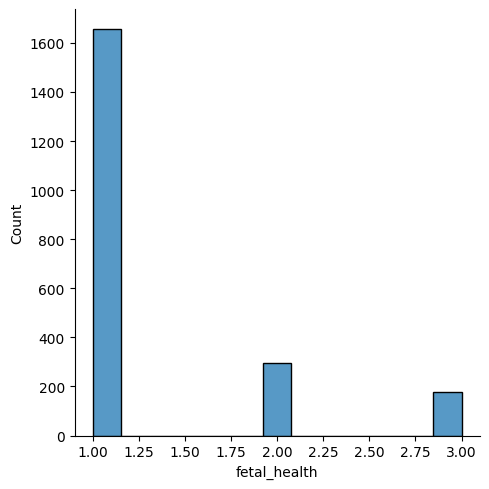

In [6]:
sns.displot(data=data['fetal_health'],kind='hist'); # by seeing the graph our dataset is unbalanced dataset 

In [7]:
data.isna().sum() # checking the if tha dataset have null values or not

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [8]:
df=data.copy() # coping data from one to another

In [9]:
y=df['fetal_health']
x=df.drop('fetal_health',axis=1)

In [10]:
from imblearn.over_sampling import SMOTE # appliying the smote techinque by going to unbalnced to balanced
smote = SMOTE()
X_re_smote , Y_re_smote = smote.fit_resample(x,y)

In [11]:
X_re_smote.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [12]:
Y_re_smote.value_counts()

2.0    1655
1.0    1655
3.0    1655
Name: fetal_health, dtype: int64

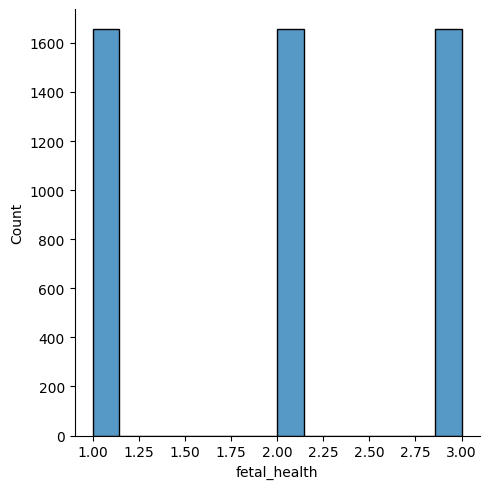

In [13]:
sns.displot(data=Y_re_smote,kind='hist'); # after the smote  our data became balanced

###  Split the dataset into Training and Testing (recommended 70:30 split).

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_re_smote,Y_re_smote,train_size=0.70,random_state=100)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(3475, 21) (3475,)
(1490, 21) (1490,)


##  Data preparation on train data:

 -- - **For Numerical Variables - `Standardization` or `Normalization` (Fit and
Transform)**

In [15]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_tra= pd.DataFrame(scaler.fit_transform(x_train), 
                                    columns = x_train.columns, 
                                    index = x_train.index)

X_tra.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
434,1.565788,-0.524125,-0.246169,0.782896,1.267498,-0.120699,-0.474381,0.374898,0.108202,0.049289,...,1.924816,-1.406723,2.046232,1.337819,3.994123,1.008601,0.852336,1.128438,0.471372,1.217067
3116,0.274712,-0.524125,-0.244219,0.433370,-0.633785,-0.120699,1.566834,0.253205,-0.201938,-0.301147,...,1.191814,-0.837147,1.329306,2.640069,1.036785,0.302310,-0.055384,0.261972,0.739121,-0.376502
2064,-0.817737,-0.524125,-0.227510,0.782896,-0.633785,-0.120699,-0.474381,0.853339,-0.305317,1.237945,...,-1.098815,0.661736,-1.428100,-0.650184,-0.441885,-0.188477,-0.294258,-0.387877,-0.555763,-0.376502
1565,0.969907,0.822653,-0.246169,0.129378,-0.633785,-0.120699,-0.474381,-0.701592,-0.512077,-0.717586,...,-0.640689,1.081423,0.446936,-0.650184,-0.441885,1.185945,1.282309,1.290900,-0.531876,-0.376502
716,-0.321169,0.485959,-0.152876,0.782896,-0.633785,-0.120699,-0.474381,0.075873,-0.718837,0.125977,...,-0.686502,0.691714,-0.380286,-0.650184,-0.441885,-0.011132,0.183490,-0.062952,-0.507989,-0.376502


In [16]:
x_test_num_transformed = pd.DataFrame(scaler.transform(x_test), 
                                   columns = x_test.columns, 
                                   index = x_test.index)

x_test_num_transformed.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
408,1.466475,-0.524125,-0.246169,-1.177658,-0.316905,-0.120699,-0.474381,1.152364,-1.028976,0.892851,...,-0.709408,0.781646,-0.269989,-0.981517,-0.441885,0.919928,1.043435,1.074284,-0.555763,1.217067
4652,-1.088656,-0.524125,-0.139360,-1.177658,-0.633785,-0.120699,-0.474381,0.804523,-0.925596,2.329184,...,-1.319541,0.691714,-1.904362,-1.071667,-0.441885,-0.398095,-0.311646,-0.515895,-0.579650,-0.376502
3043,1.084441,-0.524125,-0.072451,-1.177658,-0.463204,-0.120699,-0.474381,0.637261,-0.766566,1.335347,...,0.368943,-0.664230,-0.333695,-0.318850,-0.441885,0.735704,0.819205,0.820112,-0.544735,1.217067
1670,-2.506067,-0.524125,-0.246169,0.456137,-0.633785,-0.120699,-0.474381,0.434704,-0.615457,-0.755929,...,-0.823940,0.032205,-1.924433,-0.981517,-0.441885,-1.030865,-0.963104,-1.254342,-0.555763,-0.376502
1181,-0.917051,1.832737,-0.246169,1.109654,-0.633785,-0.120699,-0.474381,-1.598667,0.004822,-0.755929,...,-0.388720,0.302004,-0.380286,-0.318850,-0.441885,-0.277150,0.135715,-0.062952,-0.316894,-0.376502


In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_tra, y_train)

LogisticRegression()

In [18]:
y_test_pred = lr.predict(x_test_num_transformed)

In [19]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
408,2.0,2.0
4652,3.0,3.0
3043,2.0,2.0
1670,1.0,1.0
1181,1.0,1.0


In [20]:
import sklearn.metrics as metrics
A=metrics.accuracy_score(y_test_pred,y_test)

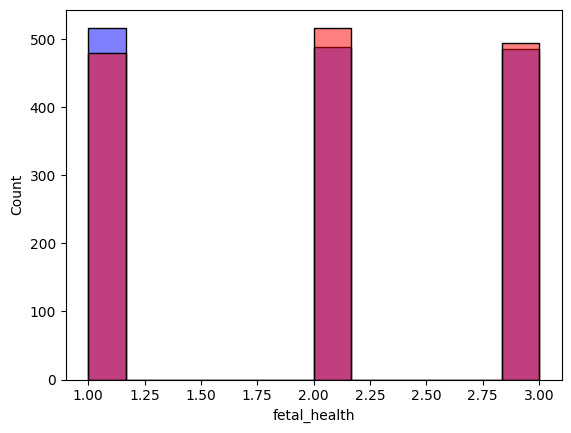

In [21]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_tra, y_train)

KNeighborsClassifier()

In [23]:
y_test_pred = knn.predict(x_test_num_transformed)

In [24]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
408,2.0,2.0
4652,3.0,3.0
3043,2.0,2.0
1670,1.0,1.0
1181,1.0,1.0


In [25]:
B=metrics.accuracy_score(y_test_pred,y_test)

In [26]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_tra, y_train)

DecisionTreeRegressor()

In [27]:
y_test_pre=regressor.predict(x_test_num_transformed)

In [28]:
C=metrics.accuracy_score(y_test_pre,y_test)

In [29]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
408,2.0,2.0
4652,3.0,3.0
3043,2.0,2.0
1670,1.0,1.0
1181,1.0,1.0


In [30]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_tra, y_train)

SVC()

In [31]:
y_pre=classifier.predict(x_test_num_transformed)

In [32]:
D=metrics.accuracy_score(y_pre,y_test)

In [33]:
temp_df=pd.DataFrame({'Actual':y_test,'Predict':y_pre})

In [34]:
temp_df.head()

,Actual,Predict
408,2.0,2.0
4652,3.0,3.0
3043,2.0,2.0
1670,1.0,1.0
1181,1.0,1.0


In [35]:
metrics.accuracy_score(y_pre,y_test)

0.9308724832214765

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_tra, y_train)

RandomForestClassifier()

In [37]:
y_pre=classifier.predict(x_test_num_transformed)

In [38]:
E=metrics.accuracy_score(y_pre,y_test)

In [39]:
tem_df=pd.DataFrame({'Actual':y_test,'Predict':y_pre})
tem_df.head()

,Actual,Predict
408,2.0,2.0
4652,3.0,3.0
3043,2.0,2.0
1670,1.0,1.0
1181,1.0,1.0


In [40]:
df_data = [['Logistic Classifier', A, str(round((A*100),2))+'%'],
                 ['Decision Tree Classifier',C,str(round((C*100),2))+'%'],
                 ['Support Vector Classifier',D,str(round((D*100),2))+'%'],
                 ['Random Forest Classifier ',E,str(round((E*100),2))+'%'],
            ['k-Nearest nebhiour',B,str(round((B*100),2))+'%']]

data = pd.DataFrame(df_data, columns = ['Algorithm','Accuracy','Accuracy %'])

In [41]:
data

,Algorithm,Accuracy,Accuracy %
0,Logistic Classifier,0.883221,88.32%
1,Decision Tree Classifier,0.948322,94.83%
2,Support Vector Classifier,0.930872,93.09%
3,Random Forest Classifier,0.967785,96.78%
4,k-Nearest nebhiour,0.954362,95.44%
